<a href="https://colab.research.google.com/github/Sumit120597/Sumit120597/blob/main/callbackinmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
fmnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

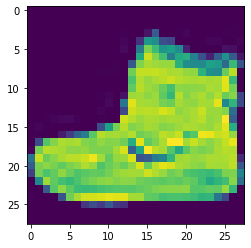

In [ ]:
import matplotlib.pyplot as plt
index=0
 # Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n{training_images[index]}')
plt.imshow(training_images[index])

In [ ]:
#normalize the images
training_images=training_images/255
test_images=test_images/255

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                           ])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4937 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3731 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8918


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8778


[0.3458491265773773, 0.8777999877929688]

using classification

In [ ]:
classification=model.predict(test_images)

In [ ]:
print(classification[0])
print(test_labels[0])

[3.7103607e-06 1.9320177e-08 4.1409512e-06 9.3267509e-08 2.5401032e-06 8.1036827e-03 2.7132290e-05 6.5607592e-02 3.9782393e-05 9.2621130e-01]
9


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.999): # Experiment with changing this value
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks=myCallback()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=1000,callbacks=[callbacks])
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/1000
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4767 - accuracy: 0.8301
Epoch 2/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3582 - accuracy: 0.8698
Epoch 3/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3234 - accuracy: 0.8803
Epoch 4/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8896
Epoch 5/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2799 - accuracy: 0.8958
Epoch 6/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9005
Epoch 7/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2520 - accuracy: 0.9051
Epoch 8/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2415 - accuracy: 0.9098
Epoch 9/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2312 - accuracy: 0.9133
Epoch 10/1000
1875/1875 [==============================] - 6s 3m